## import libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

## load dataset

In [3]:
raw = pd.read_csv('car_prices.csv', on_bad_lines='skip')
raw.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
225122,2011,Ford,Fusion,SE,Sedan,automatic,3fahp0ha7br180114,fl,3.3,90356.0,—,gray,wheels exchange llc,7450,8200,Wed Feb 04 2015 01:10:00 GMT-0800 (PST)
76184,2011,Nissan,Maxima,3.5 SV,Sedan,automatic,1n4aa5ap4bc852725,nj,2.4,40879.0,silver,black,nissan-infiniti lt,16650,14800,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
1598,2012,Mercedes-Benz,M-Class,ML350 4MATIC,SUV,automatic,4jgda5hb3ca097478,ca,4.4,18266.0,white,beige,mercedes benz of ontario,37100,37500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
153399,2011,Nissan,Murano,SL,SUV,NaN,jn8az1mw6bw187795,pa,4.6,60181.0,gray,black,nissan-infiniti lt,17400,17600,Fri Jan 23 2015 01:00:00 GMT-0800 (PST)
445799,2013,Nissan,Leaf,SV,Hatchback,automatic,1n4az0cp1dc410920,ca,4.8,13378.0,blue,beige,nissan-infiniti lt,9875,9250,Tue Jun 02 2015 05:30:00 GMT-0700 (PDT)


In [18]:
cat = ['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']
for i in cat:
    raw[i] = raw[i].str.lower()

### `make`

In [19]:
df = raw.copy()
df.loc[df['make'].str.contains('chev',na=False), 'make'] = 'chevrolet'
df.loc[df['make'].str.contains('dodge',na=False), 'make'] = 'dodge'
df.loc[df['make'].str.contains('mazda',na=False), 'make'] = 'mazda'
df.loc[df['make'].str.contains('hyundai',na=False), 'make'] = 'hyundai'
df.loc[df['make'].str.contains('ford',na=False), 'make'] = 'ford'
df.loc[df['make'].str.contains('mercedes',na=False), 'make'] = 'mercedes-benz'
df.loc[df['make'].str.contains('vw',na=False), 'make'] = 'volkswagen'
df.loc[df['make'].str.contains('gmc',na=False), 'make'] = 'gmc'
df.loc[df['make'].str.contains('landrover',na=False), 'make'] = 'land rover'

In [20]:
df['make'].describe()

count     548510
unique        55
top         ford
freq       94001
Name: make, dtype: object

In [70]:
make = df.groupby('make').agg({'sellingprice':['count','median','mean','sum']}).reset_index().sort_values(('sellingprice','count'),ascending=False)
make.columns = ['make','total_sold','median','avg','revenue']
make['percent'] = 100 * make['total_sold']/(make['total_sold'].sum())
make = make[['make','total_sold','percent','median','avg','revenue']].reset_index(drop=True)
make

,make,total_sold,percent,median,avg,revenue
0,ford,94001,17.137518,13500.0,14495.513154,1362592732
1,chevrolet,60588,11.045924,10500.0,11939.195039,723371949
2,nissan,54017,9.847952,12000.0,11731.562379,633703805
3,toyota,39966,7.286285,12100.0,12237.650128,489089925
4,dodge,30956,5.643653,10500.0,11163.758851,345585319
5,honda,27351,4.986418,11000.0,10905.410552,298273884
6,hyundai,21837,3.981149,11300.0,11002.252416,240256186
7,bmw,20793,3.790815,20100.0,21474.030347,446509513
8,kia,18084,3.296932,12175.0,11805.383931,213488563
9,chrysler,17485,3.187727,10200.0,11068.328053,193529716


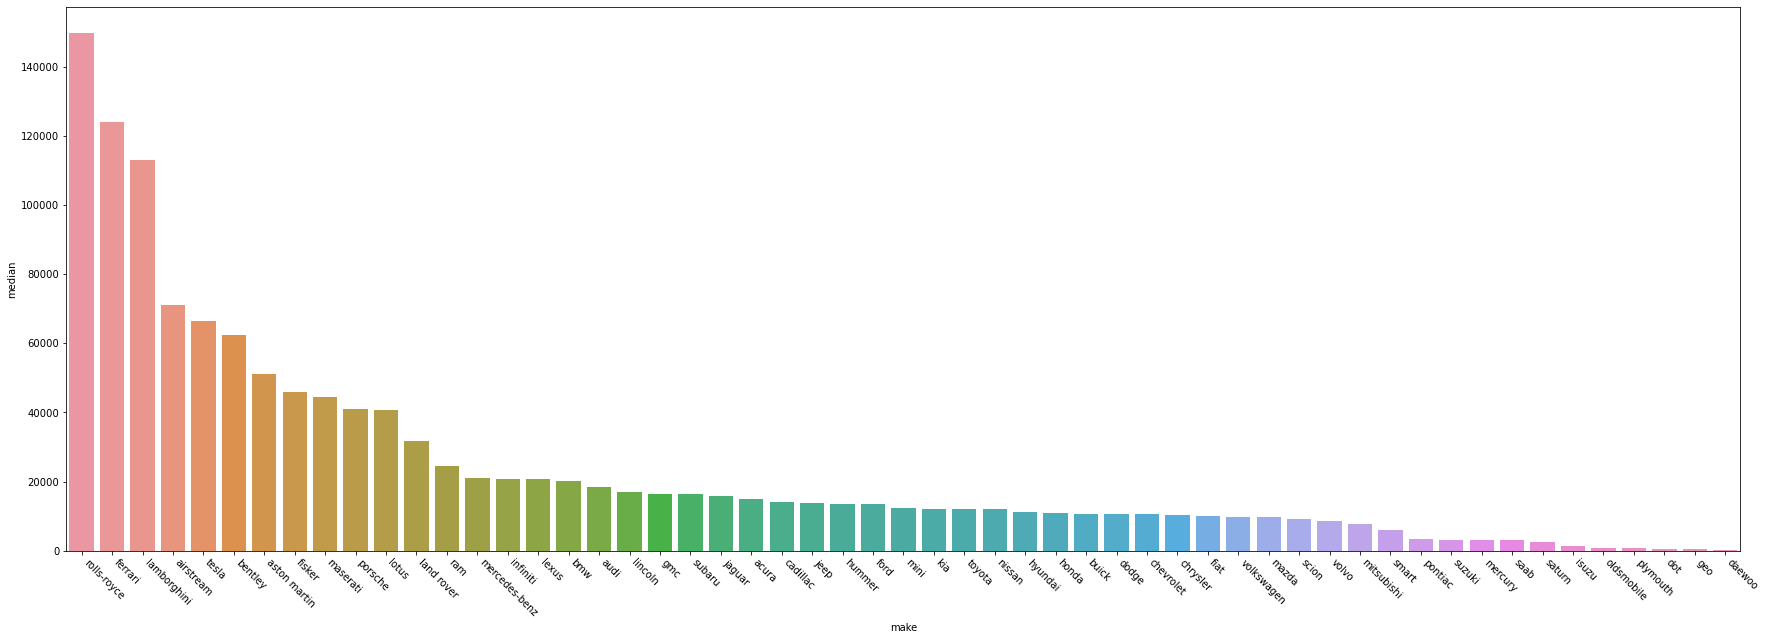

In [41]:
plt.figure(figsize=(30,10))
sns.barplot(data=make,x='make',y='median', order = make.sort_values('median',ascending=False)['make'])
plt.xticks(rotation=-45, ha='left');

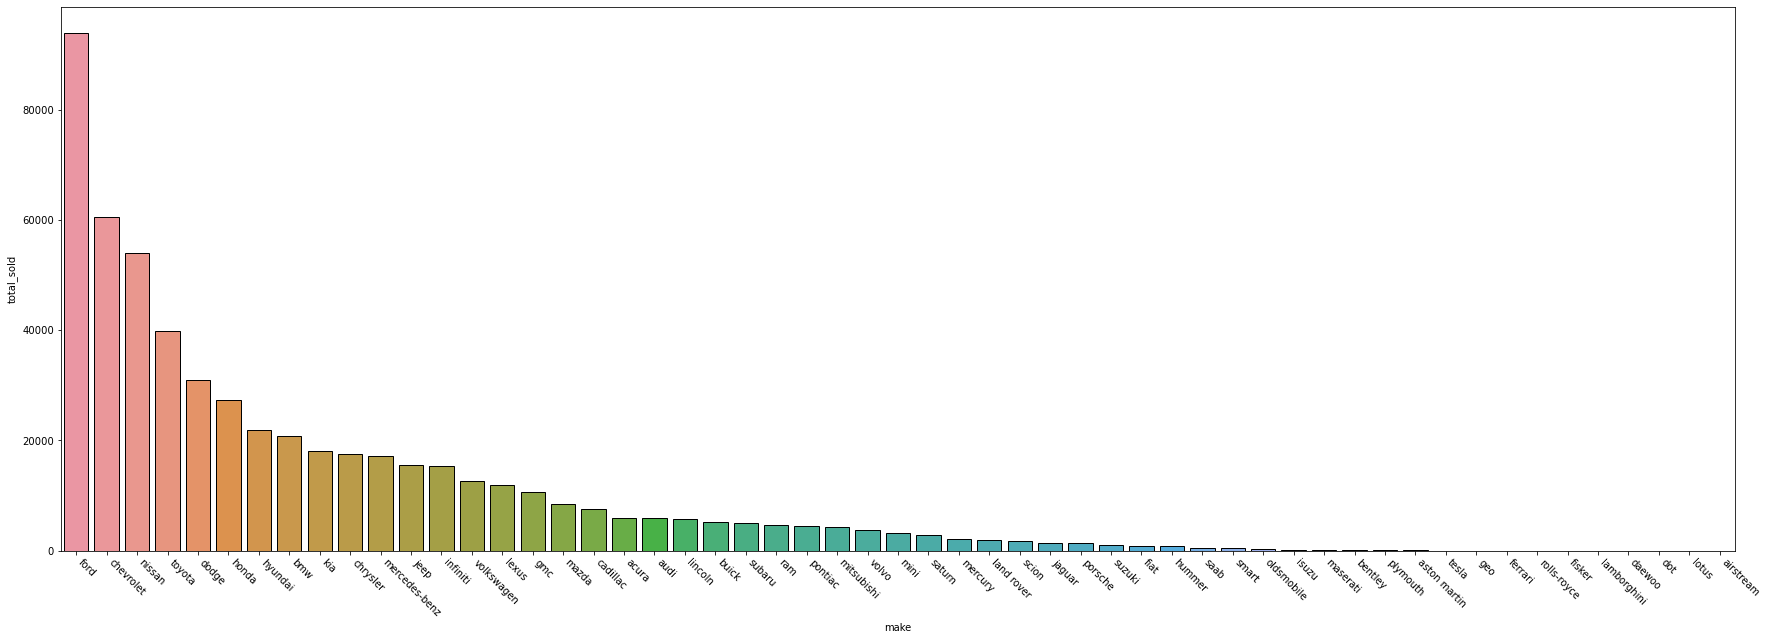

In [99]:
plt.figure(figsize=(30,10))
sns.barplot(data=make,x='make',y='total_sold', order = make.sort_values('total_sold',ascending=False)['make'], edgecolor='black')
plt.xticks(rotation=-45, ha='left');

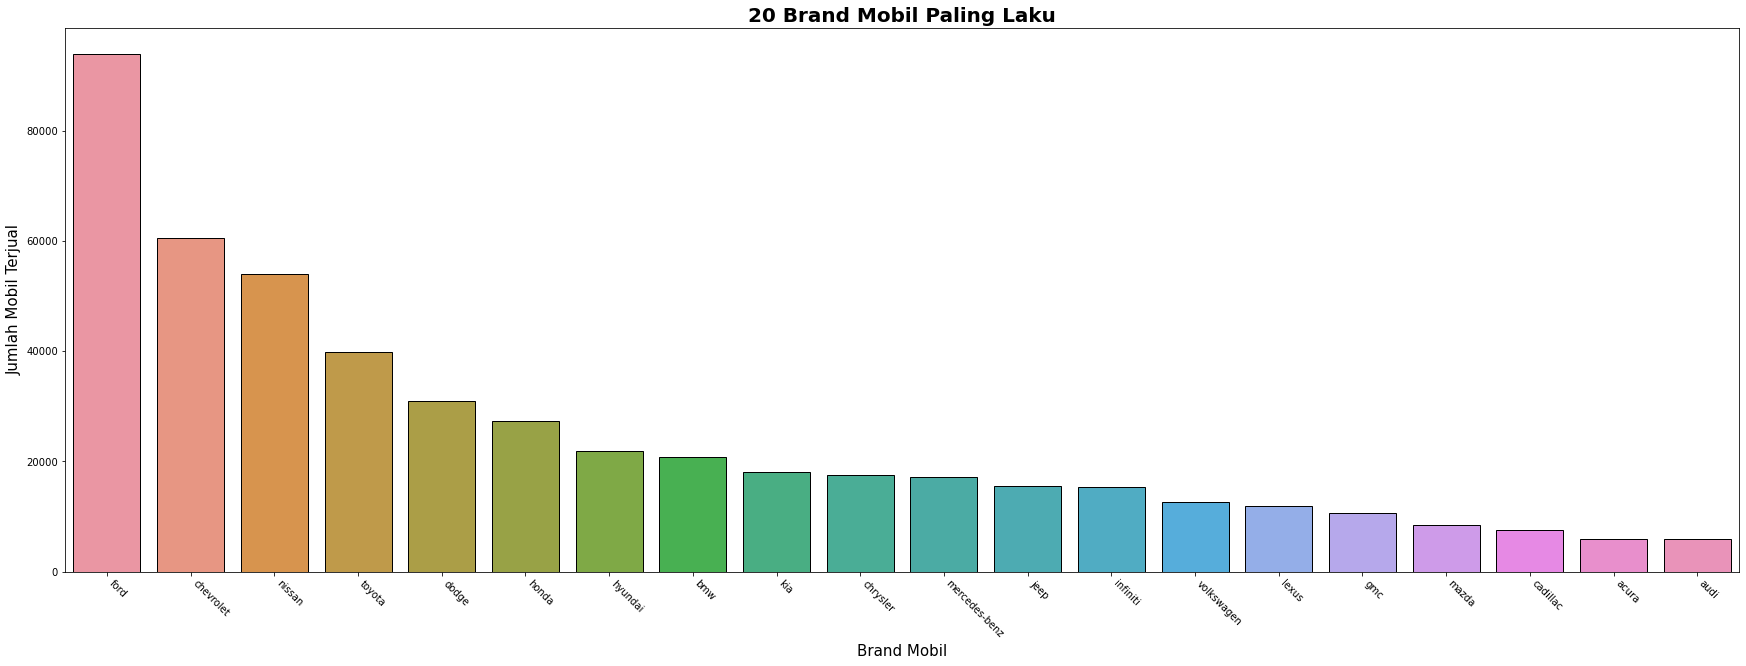

In [100]:
plt.figure(figsize=(30,10))
sns.barplot(data=make.sort_values('total_sold',ascending=False).head(20), 
            x='make',
            y='total_sold', 
            order = make.sort_values('total_sold',ascending=False).head(20)['make'],
            edgecolor='black'
           )
plt.xticks(rotation=-45, ha='left')
plt.xlabel('Brand Mobil', size=15)
plt.ylabel('Jumlah Mobil Terjual', size=15)
plt.title('20 Brand Mobil Paling Laku', size=20,weight='bold');

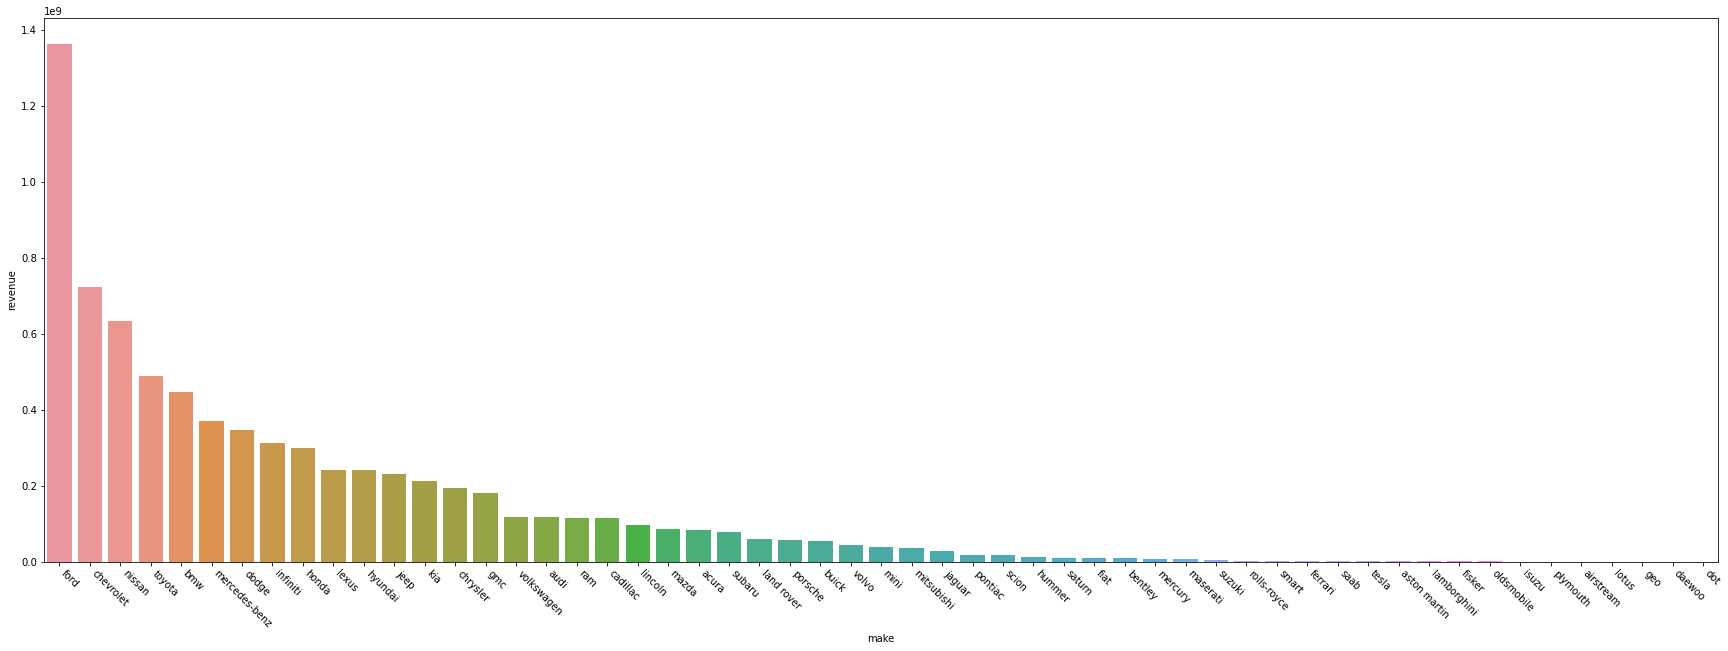

In [42]:
plt.figure(figsize=(30,10))
sns.barplot(data=make,x='make',y='revenue', order = make.sort_values('revenue',ascending=False)['make'])
plt.xticks(rotation=-45, ha='left');

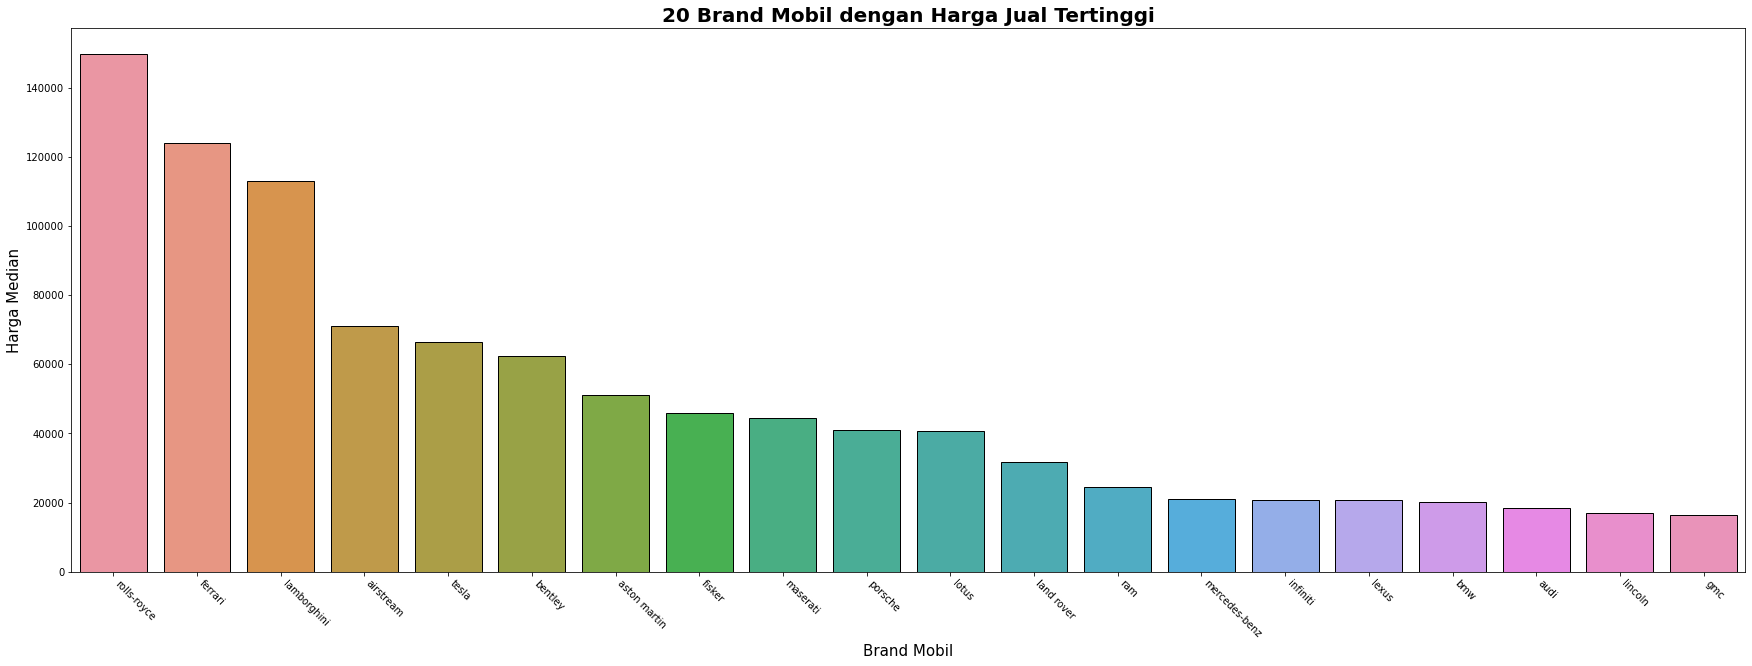

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(data=make.sort_values('median',ascending=False).head(20),x='make',y='median', order = make.sort_values('median',ascending=False).head(20)['make'], edgecolor='black')
plt.xticks(rotation=-45, ha='left')
plt.xlabel('Brand Mobil', size=15)
plt.ylabel('Harga Median', size=15)
plt.title('20 Brand Mobil dengan Harga Jual Tertinggi', size=20,weight='bold');

### `body`

In [ ]:
df[df['body'].str.contains('cab')==True]['body'].unique()

array(['crew cab', 'double cab', 'crewmax cab', 'access cab', 'king cab',
       'extended cab', 'supercab', 'regular cab', 'quad cab', 'club cab',
       'xtracab', 'mega cab', 'cab plus 4', 'cab plus', 'regular-cab'],
      dtype=object)

In [69]:
body = df.groupby('body').agg({'sellingprice':['count','median','mean','sum']}).reset_index().sort_values(('sellingprice','count'),ascending=False)
body.columns = ['body','total_sold','median','avg','revenue']
body['percent'] = round(100 * body['total_sold']/(body['total_sold'].sum()))
body = body[['body','total_sold','percent','median','avg','revenue']].reset_index(drop=True)
body

,body,total_sold,percent,median,avg,revenue
0,sedan,241343,44.0,11000.0,11716.468864,2827687745
1,suv,143844,26.0,15100.0,16115.916681,2318177919
2,hatchback,26237,5.0,9900.0,10045.733506,263569910
3,minivan,25529,5.0,11400.0,11568.809628,295340141
4,coupe,17752,3.0,13700.0,15927.819063,282750644
5,crew cab,16394,3.0,21200.0,21649.048859,354914507
6,wagon,16129,3.0,8800.0,10124.252341,163294066
7,convertible,10476,2.0,13900.0,17840.464013,186896701
8,supercrew,9033,2.0,23300.0,22098.393003,199614784
9,g sedan,7417,1.0,20000.0,19943.212350,147918806


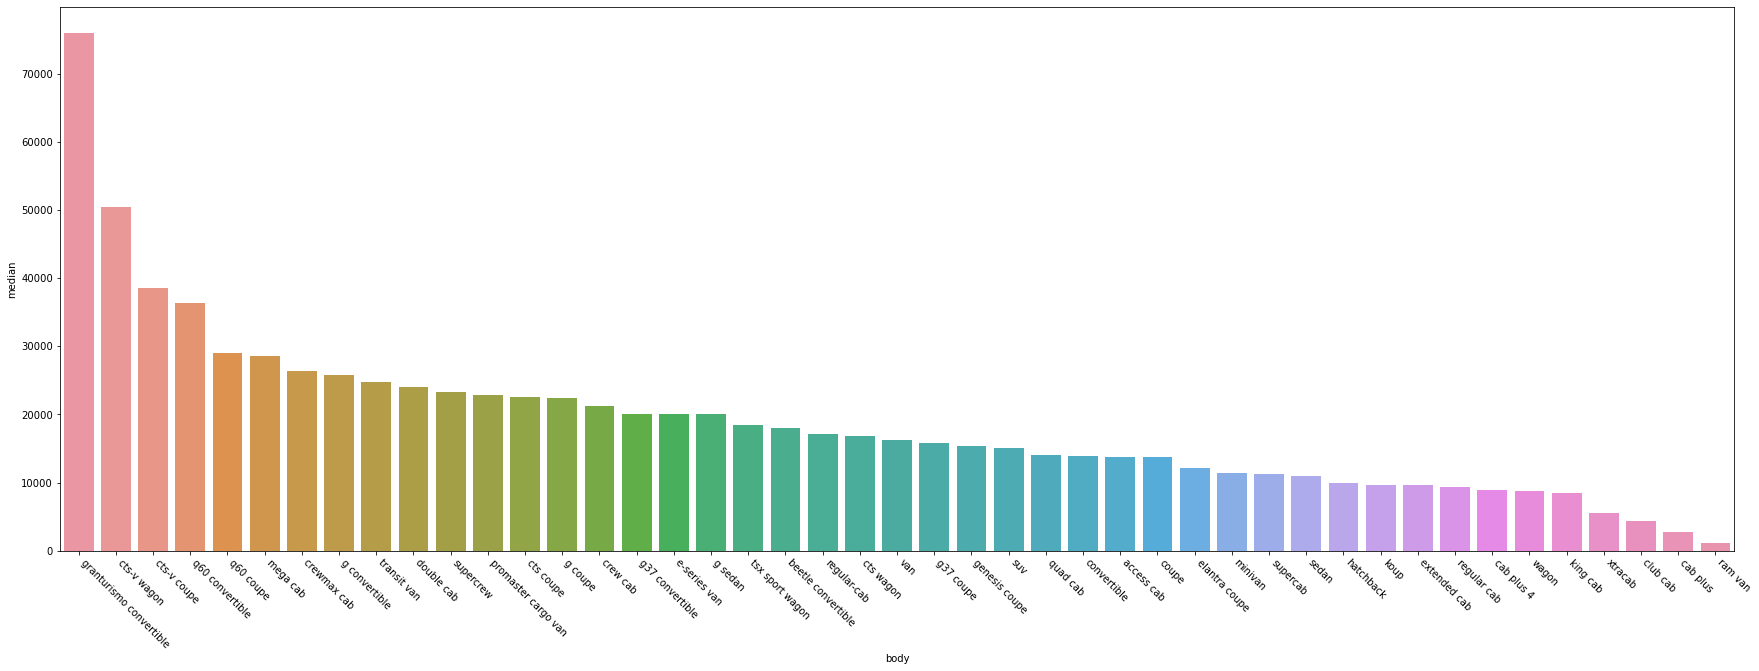

In [61]:
plt.figure(figsize=(30,10))
sns.barplot(data=body,x='body',y='median', order = body.sort_values('median',ascending=False)['body'])
plt.xticks(rotation=-45, ha='left');

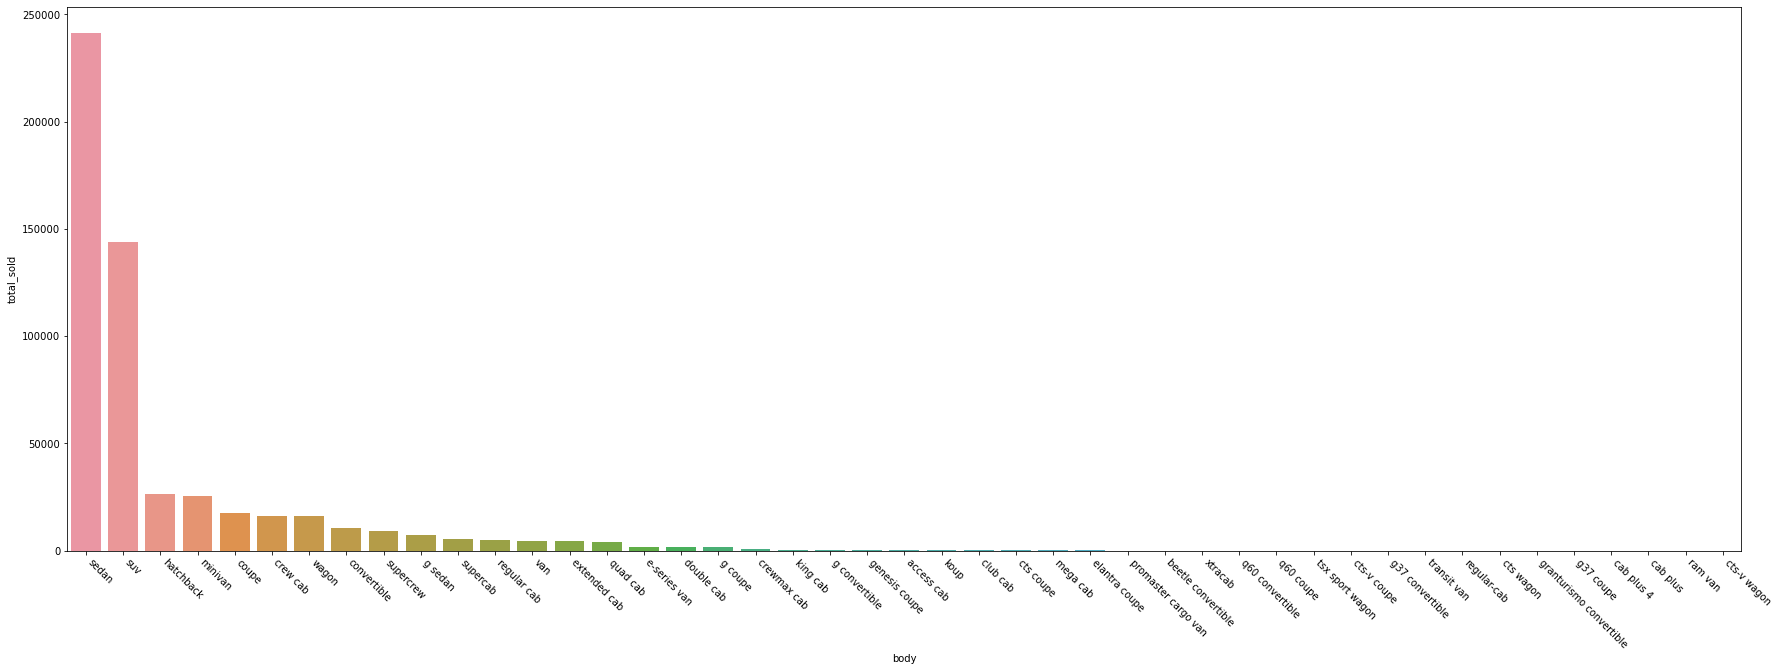

In [62]:
plt.figure(figsize=(30,10))
sns.barplot(data=body,x='body',y='total_sold', order = body.sort_values('total_sold',ascending=False)['body'])
plt.xticks(rotation=-45, ha='left');

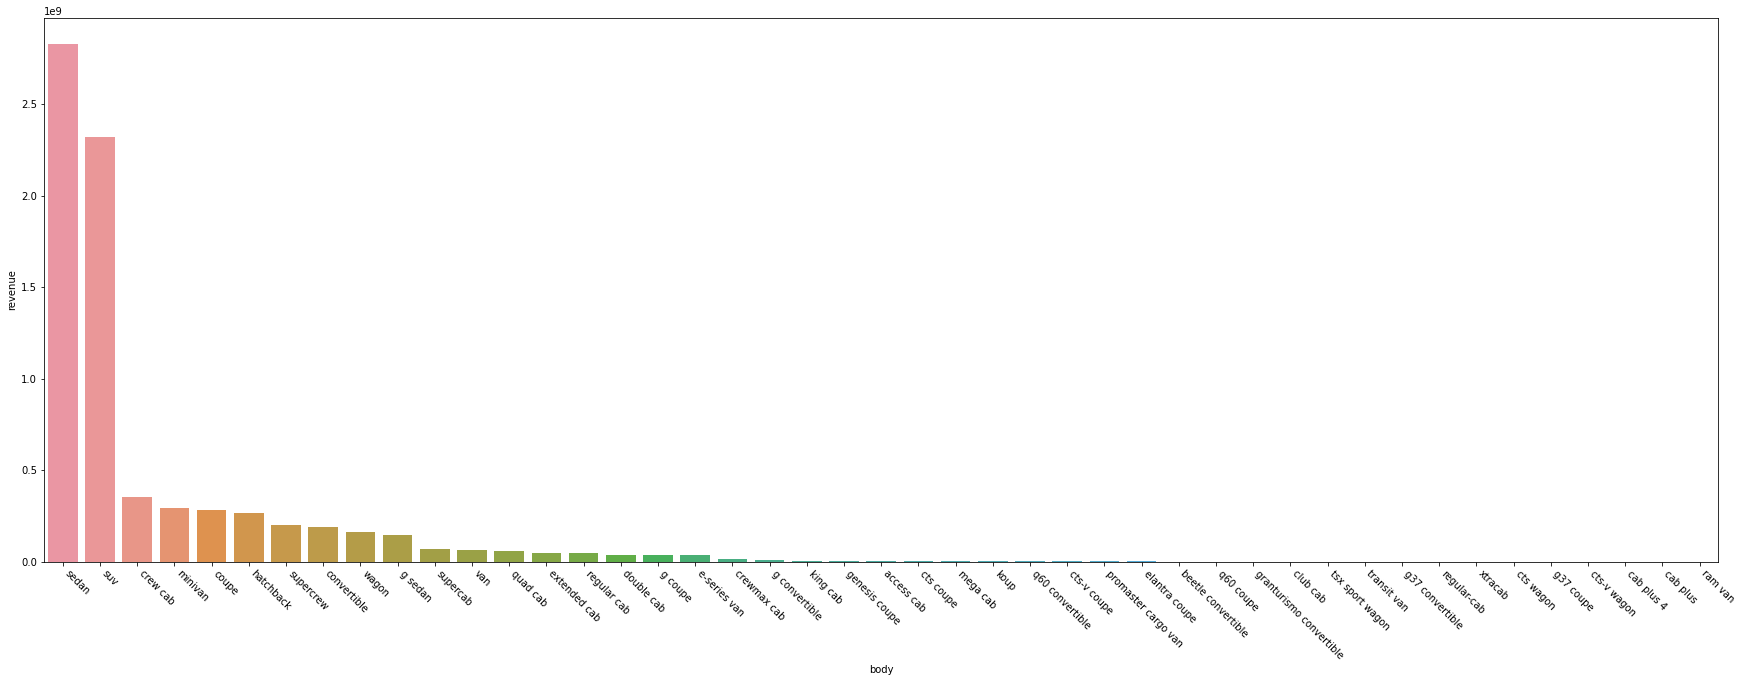

In [65]:
plt.figure(figsize=(30,10))
sns.barplot(data=body,x='body',y='revenue', order = body.sort_values('revenue',ascending=False)['body'])
plt.xticks(rotation=-45, ha='left');

In [66]:
# df.loc[df['body'].str.contains('convertible',na=False), 'body'] = 'convertible'
# df.loc[df['body'].str.contains('cab',na=False), 'body'] = 'cab'
# df.loc[df['body'].str.contains(' van',na=False), 'body'] = 'van'
# df.loc[df['body'].str.contains('wagon',na=False), 'body'] = 'wagon'
# df.loc[df['body'].str.contains('coupe',na=False), 'body'] = 'coupe'
# df.loc[df['body'].str.contains('koup',na=False), 'body'] = 'coupe'
# df.loc[df['body'].str.contains('sedan',na=False), 'body'] = 'sedan'

### `color`

In [77]:
color = df.groupby('color').agg({'sellingprice':['count','median','mean','sum']}).reset_index().sort_values(('sellingprice','count'),ascending=False)
color.columns = ['color','total_sold','median','avg','revenue']
color['percent'] = round(100 * color['total_sold']/(color['total_sold'].sum()))
color = color[['color','total_sold','percent','median','avg','revenue']]
color

,color,total_sold,percent,median,avg,revenue
1,black,110970,20.0,13500.0,15508.967721,1721030148
17,white,106673,19.0,13200.0,14740.549305,1572418616
15,silver,83389,15.0,10600.0,11780.854813,982393702
7,gray,82857,15.0,12500.0,13951.274292,1155960734
2,blue,51139,9.0,10500.0,11440.610395,585061375
14,red,43569,8.0,11600.0,12688.912002,552843207
19,—,24685,4.0,16000.0,17819.737249,439880214
8,green,11382,2.0,5600.0,8301.808733,94491187
6,gold,11342,2.0,6100.0,8324.714953,94418917
0,beige,9222,2.0,7600.0,9431.169269,86974243


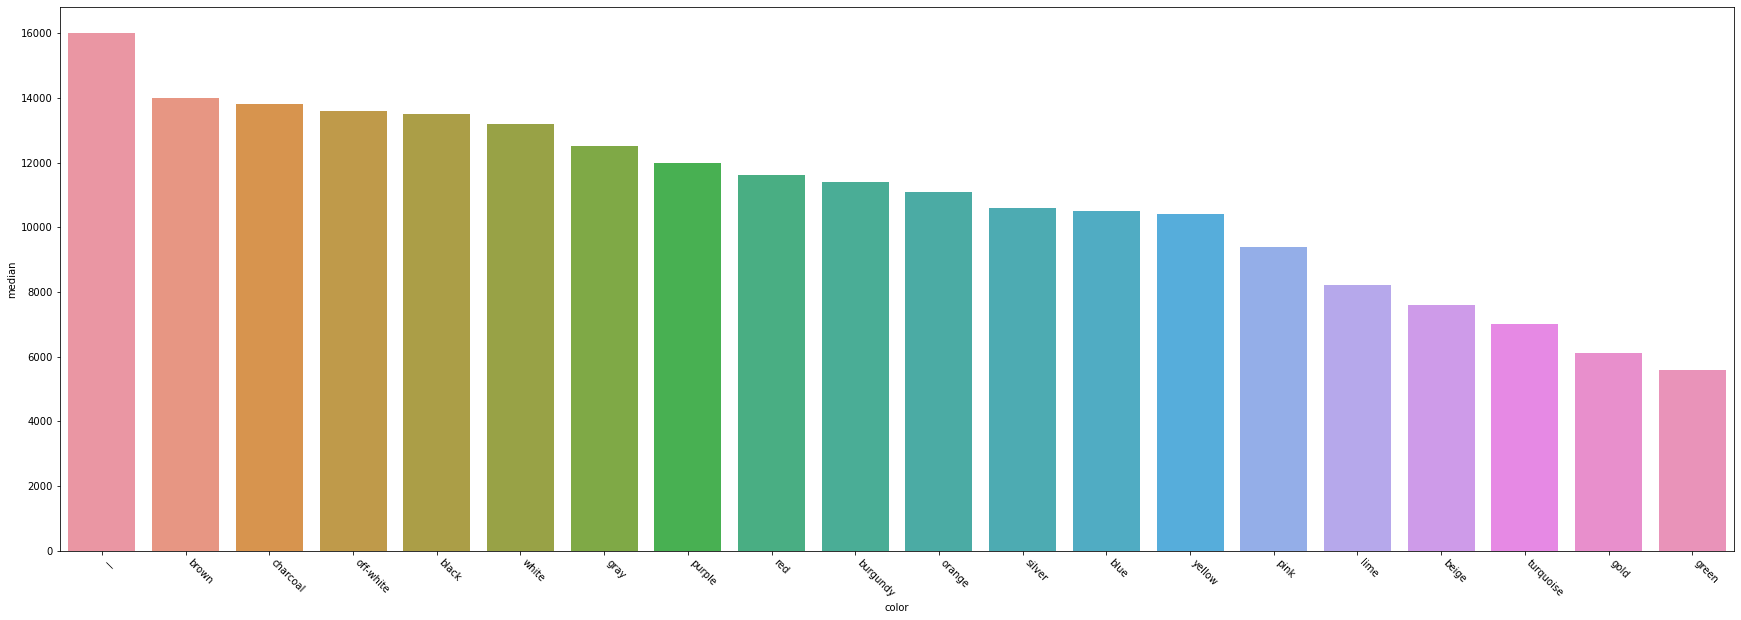

In [78]:
plt.figure(figsize=(30,10))
sns.barplot(data=color,x='color',y='median', order = color.sort_values('median',ascending=False)['color'])
plt.xticks(rotation=-45, ha='left');

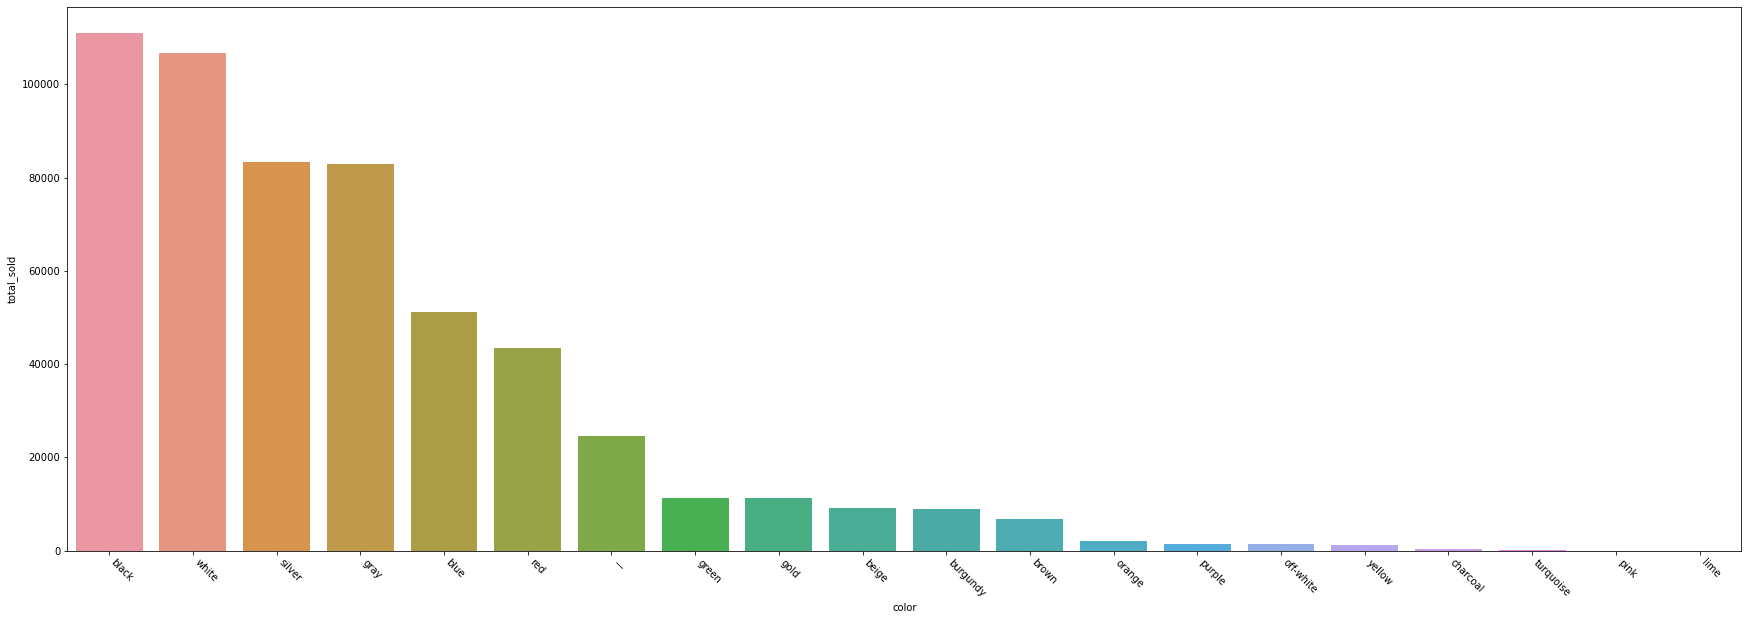

In [79]:
plt.figure(figsize=(30,10))
sns.barplot(data=color,x='color',y='total_sold', order = color.sort_values('total_sold',ascending=False)['color'])
plt.xticks(rotation=-45, ha='left');

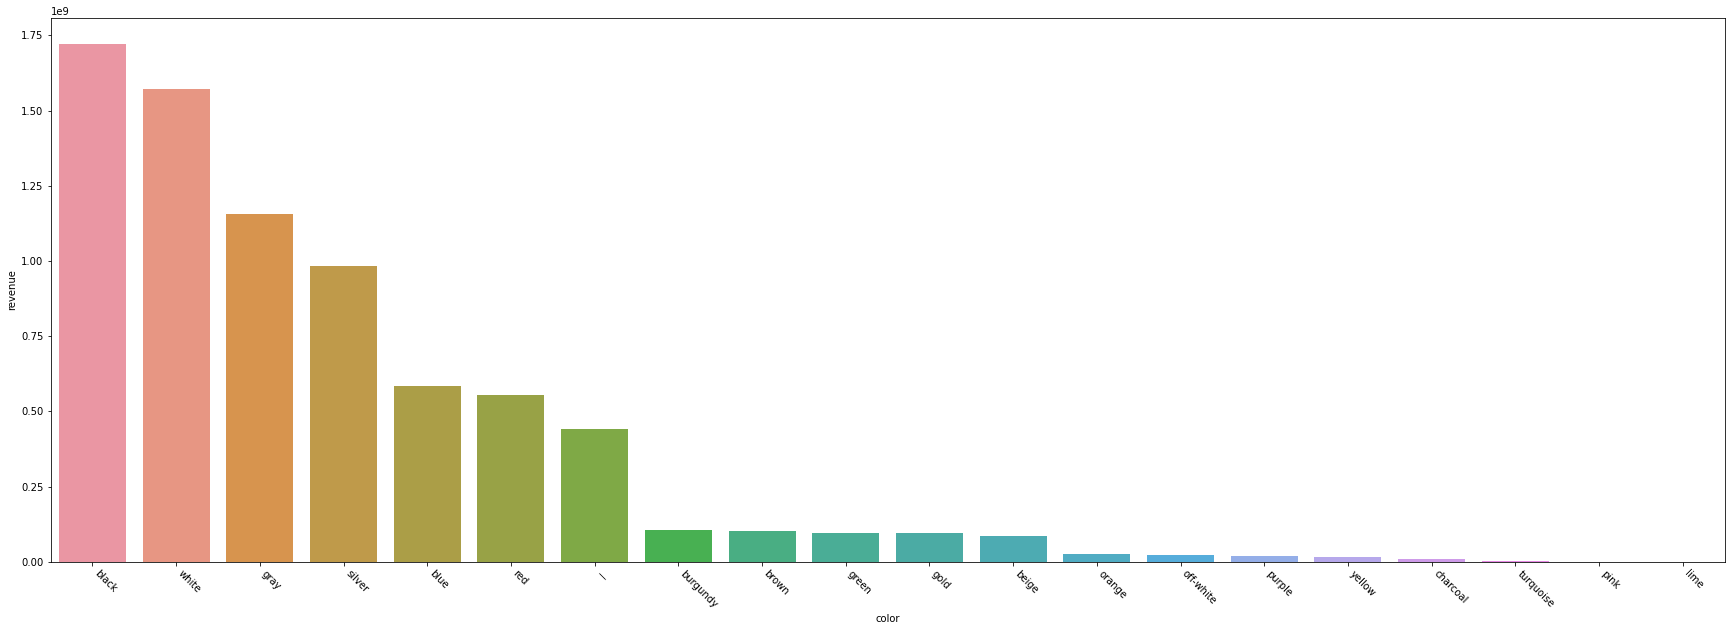

In [80]:
plt.figure(figsize=(30,10))
sns.barplot(data=color,x='color',y='revenue', order = color.sort_values('revenue',ascending=False)['color'])
plt.xticks(rotation=-45, ha='left');

### `trim`

In [92]:
trim = df.groupby('trim').agg({'sellingprice':['count','median','mean','sum']}).reset_index().sort_values(('sellingprice','count'),ascending=False)
trim.columns = ['trim','total_sold','median','avg','revenue']
trim['percent'] = round(100 * trim['total_sold']/(trim['total_sold'].sum()))
trim = trim[['trim','total_sold','percent','median','avg','revenue']].reset_index(drop=True)
trim

,trim,total_sold,percent,median,avg,revenue
0,base,55842,10.0,11700.0,13865.773755,774292538
1,se,43691,8.0,11600.0,11214.066490,489953779
2,lx,20782,4.0,11000.0,10278.458570,213606926
3,limited,18358,3.0,16000.0,16592.899771,304612454
4,lt,16984,3.0,12200.0,13753.137541,233583288
...,...,...,...,...,...,...
1896,4x2 v6 limited,1,0.0,3600.0,3600.000000,3600
1897,premium fleet,1,0.0,1800.0,1800.000000,1800
1898,2.3 premium,1,0.0,1900.0,1900.000000,1900
1899,premium cartier,1,0.0,2900.0,2900.000000,2900


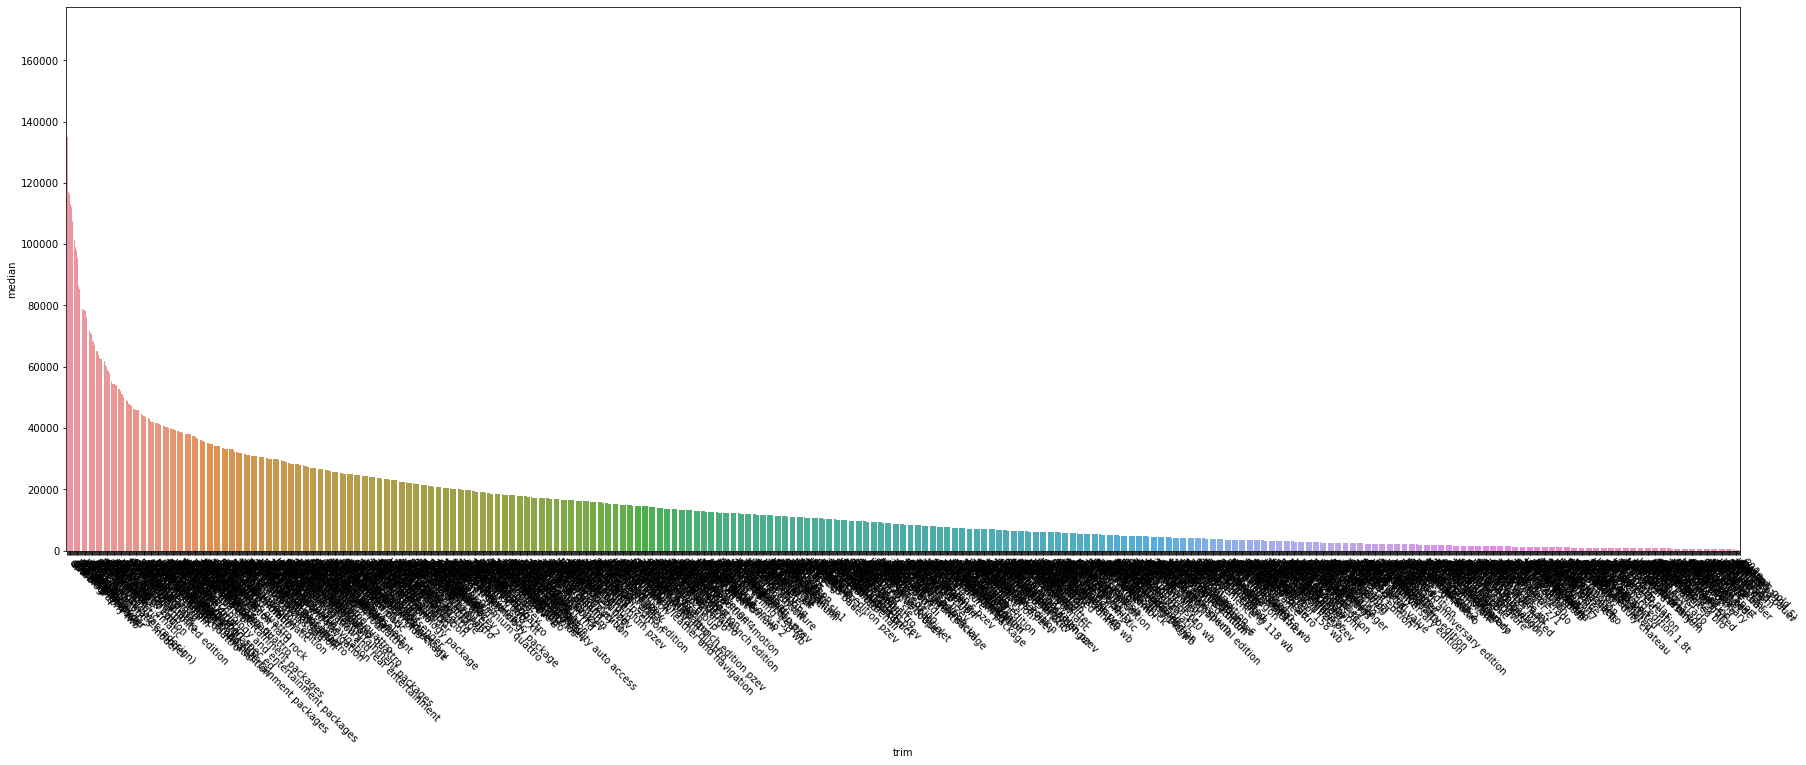

In [81]:
plt.figure(figsize=(30,10))
sns.barplot(data=trim,x='trim',y='median', order = trim.sort_values('median',ascending=False)['trim'])
plt.xticks(rotation=-45, ha='left');

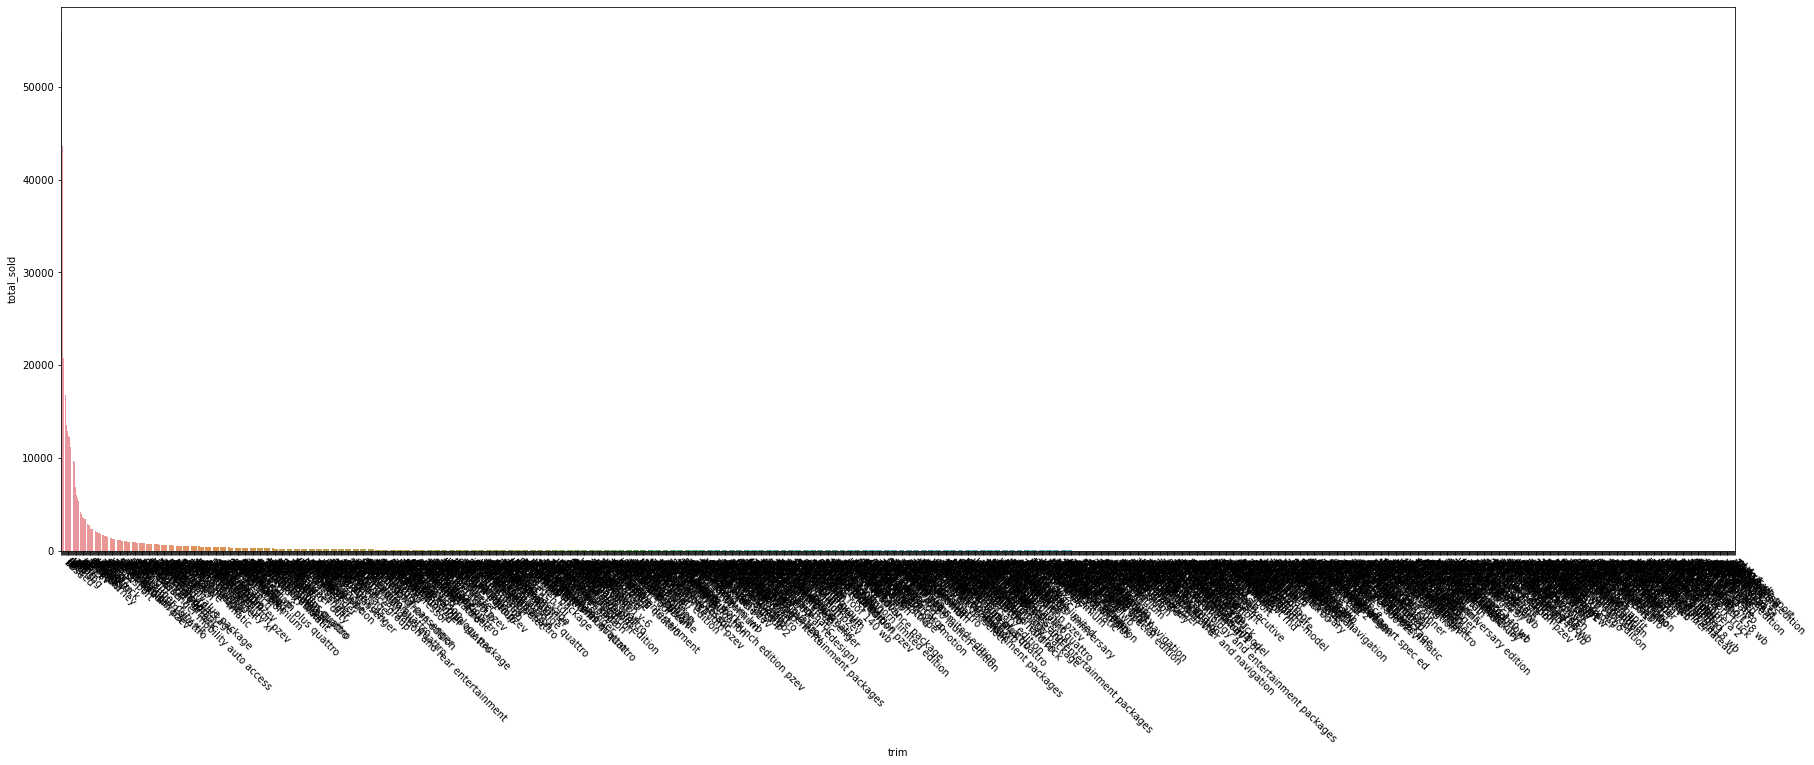

In [93]:
plt.figure(figsize=(30,10))
sns.barplot(data=trim,x='trim',y='total_sold', order = trim.sort_values('total_sold',ascending=False)['trim'])
plt.xticks(rotation=-45, ha='left');

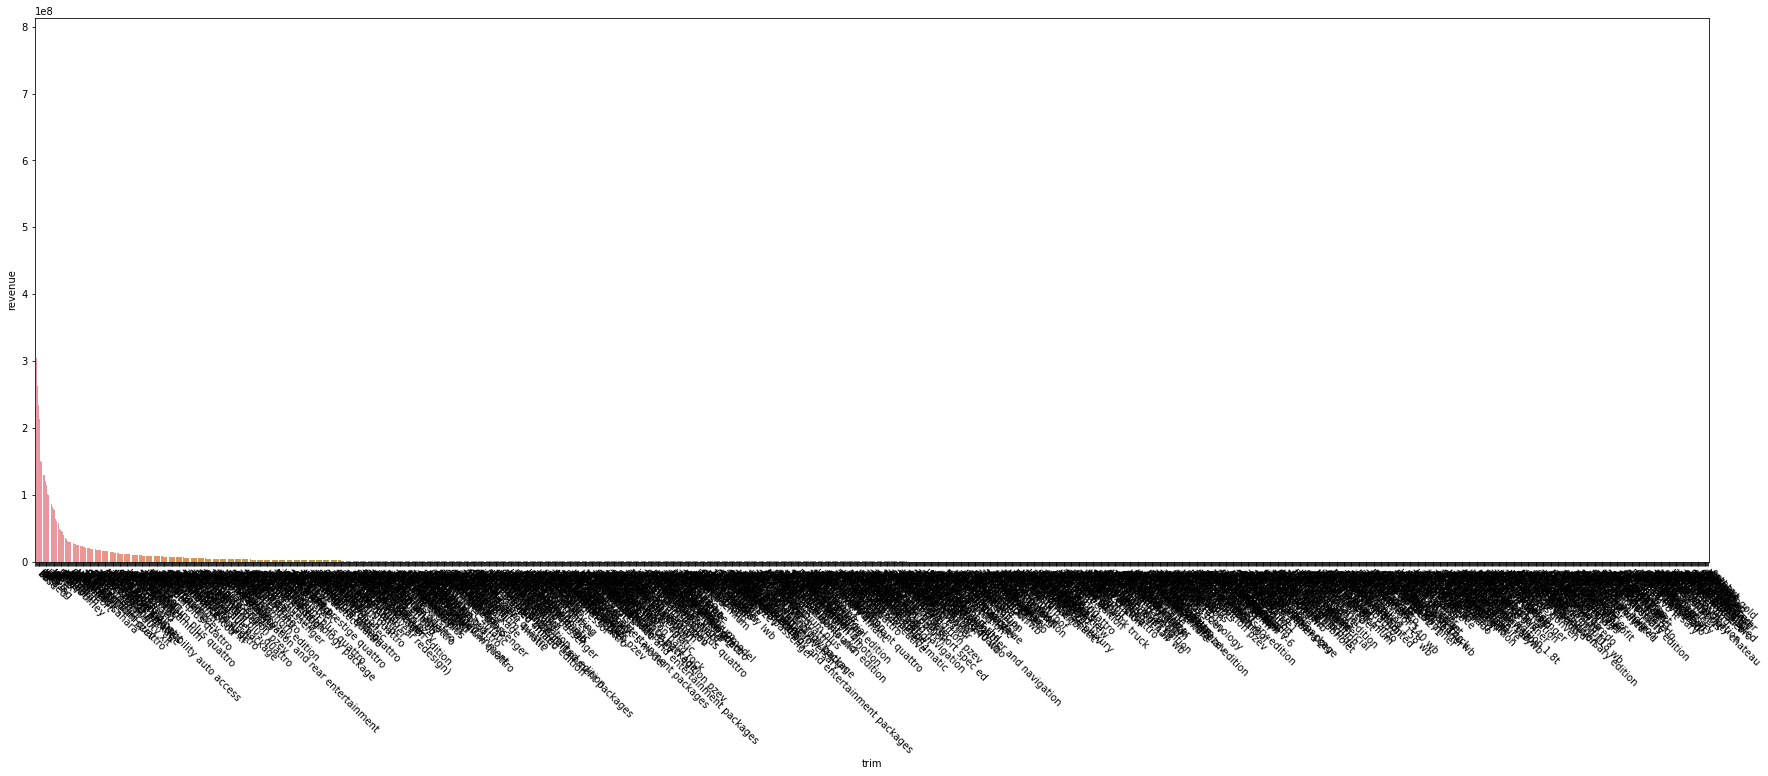

In [95]:
plt.figure(figsize=(30,10))
sns.barplot(data=trim,x='trim',y='revenue', order = trim.sort_values('revenue',ascending=False)['trim'])
plt.xticks(rotation=-45, ha='left');

## Business Recommendation

In [151]:
rand = []
for i in range(0,101):
    random_100 = df[~df['make'].isin(['bmw','infiniti','merc'])].sample(100)
    i = random_100['sellingprice'].sum()
    rand.append(i)
    
rev_rand = round(sum(rand)/len(rand))
rev_rand

1313080

In [131]:
opt_10 = []
df_bmw = df[df['make']=='bmw']
df_infiniti = df[df['make']=='infiniti']
df_merc = df[df['make']=='mercedes-benz']
for i in range(0,101):
    bmw = df_bmw.sample(3)
    infiniti = df_infiniti.sample(3)
    merc = df_merc.sample(4)
    rand_90 = df.sample(90)
    df_opt = pd.concat([bmw,infiniti,merc,rand_90])
    i = df_opt['sellingprice'].sum()
    opt_10.append(i)

rev_10 = round(sum(opt_10)/len(opt_10))
rev_10

1448105

In [132]:
opt_20 = []
for i in range(0,101):
    bmw = df_bmw.sample(6)
    infiniti = df_infiniti.sample(7)
    merc = df_merc.sample(7)
    rand_80 = raw.sample(80)
    df_opt = pd.concat([bmw,infiniti,merc,rand_80])
    i = df_opt['sellingprice'].sum()
    opt_20.append(i)

rev_20 = round(sum(opt_20)/len(opt_20))
rev_20

1516444

In [156]:
sel_sum = pd.DataFrame({'rand':rand, 'opt_10':opt_10, 'opt_20':opt_20})
sel_sum['10%>rand'] = np.where(sel_sum['opt_10']>sel_sum['rand'],1,0)
sel_sum['20%>rand'] = np.where(sel_sum['opt_20']>sel_sum['rand'],1,0)
sel_sum

,rand,opt_10,opt_20,10%>rand,20%>rand
0,1282950,1429101,1486350,1,1
1,1285300,1505700,1499300,1,1
2,1320300,1425000,1449550,1,1
3,1315950,1504100,1495650,1,1
4,1217500,1517050,1747900,1,1
...,...,...,...,...,...
96,1452651,1369400,1493050,0,1
97,1411250,1503801,1526350,1,1
98,1191150,1468600,1641601,1,1
99,1135850,1413650,1607400,1,1


In [157]:
sel_sum[['10%>rand','20%>rand']].sum()

10%>rand    84
20%>rand    93
dtype: int64

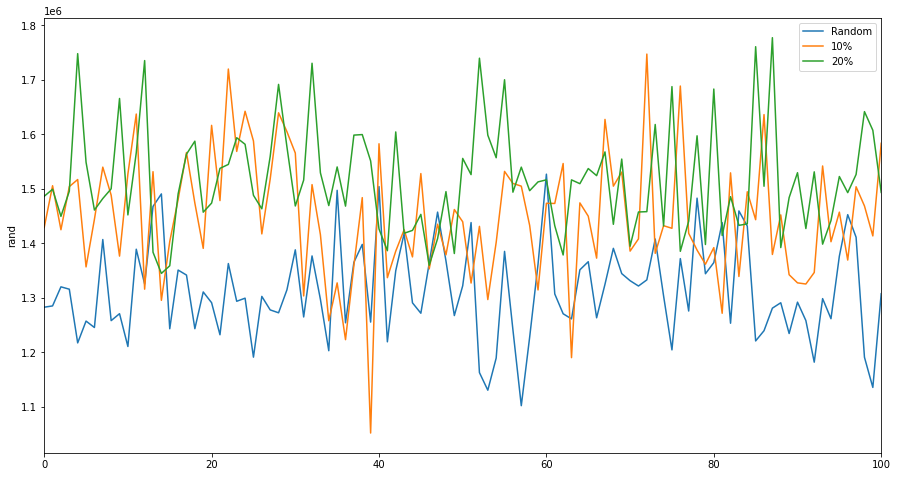

In [154]:
plt.figure(figsize=(15,8))
sns.lineplot(x=sel_sum.index.values, y=sel_sum['rand'], label='Random')
sns.lineplot(x=sel_sum.index.values, y=sel_sum['opt_10'], label='10%')
sns.lineplot(x=sel_sum.index.values, y=sel_sum['opt_20'], label='20%')
plt.xlim(0,100)
plt.legend();